## Задание 1

Какова вероятность отправиться на прогулку если идёт дождь, при наличии следующих наблюдений?

```
data = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]
```

Импортируем нужные бибилитоеки. Рandas для работы с датасетами и LogisticRegression для поиска вероятности того, что данное исходное значение принадлежит к определенному классу.

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

Создадим список данных из задания

In [2]:
data = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]

Создадим датафрейм из заданных данных

In [3]:
df = pd.DataFrame(data, columns=['погода', 'прогулка'])

Посмотрим на то что получилось

In [4]:
df

,погода,прогулка
0,солнечно,True
1,снег,False
2,облачно,False
3,дождь,False
4,солнечно,True
5,снег,False
6,облачно,True
7,снег,False
8,солнечно,False
9,облачно,True


Преобразуем категориальные переменные в числовые значения

In [5]:
df['погода'] = pd.Categorical(df['погода']).codes

посмотрим что вышло

In [6]:
df

,погода,прогулка
0,3,True
1,2,False
2,1,False
3,0,False
4,3,True
5,2,False
6,1,True
7,2,False
8,3,False
9,1,True


Разделяем данные предиктор (X) и целевой признак (y).

In [7]:
X = df[['погода']]
y = df['прогулка']

Обучаем модель логистической регрессии

In [8]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

Предсказываем вероятность прогулки во время дождя (погодный код дождя — 0)

In [9]:
rain_probability = model.predict_proba([[0]])[0][1]
rain_probability

C:\Users\Sovano\Desktop\ML\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.4443067966379402

# Задание 2

## Загрузите датасет для классификации (см. файл Excel для Лаб.работы №3), проведите предобработку, выделите целевой признак и предикторы, разбейте данные на обучающую и тестовую выборку.

Импортируем датасет

In [10]:
df = pd.read_csv('..\data\weatherAUS.csv')

Теперь посмотрим на то как выглядит наш датасет

In [11]:
df.head (20)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


Просмотрим общую информацию о датасете

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Обработаем пропущенные значения

In [13]:
missing_values = df.isnull().sum()
missing_values

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [14]:
for column in df.columns:
    if df[column].dtype == 'int64':
        df[column].fillna(df[column].median(), inplace=True)
    elif df[column].dtype == 'float64':
        df[column].fillna(df[column].mean(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

In [15]:
missing_values = df.isnull().sum()
missing_values

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Поменяем наименования столбиков 

In [16]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [17]:
df = df.rename (
    columns = {
        'Date' : 'date',
        'Location' : 'location',
        'MinTemp' : 'min_temp',
        'MaxTemp' : 'max_temp',
        'Rainfall' : 'rainfall',
        'Evaporation' : 'evaporation',
        'Sunshine' : 'sunshine',
        'WindGustDir' : 'wind_gust_dir',
        'WindGustSpeed' : 'wind_gust_speed',
        'WindDir9am' : 'wind_dir_9am',
        'WindDir3pm' : 'wind_dir_3pm',
        'WindSpeed9am' : 'wind_speed_9am',
        'WindSpeed3pm' : 'wind_speed_3pm',
        'Humidity9am' : 'humidity_9am',
        'Humidity3pm' : 'humidity_3pm',
        'Pressure9am' : 'pressure_9am',
        'Pressure3pm' : 'pressure_3pm',
        'Cloud9am' : 'cloud_9am',
        'Cloud3pm' : 'cloud_3pm',
        'Temp9am' : 'temp_9am',
        'Temp3pm' : 'temp_3pm',
        'RainToday' : 'rain_today',
        'RainTomorrow' : 'rain_tomorrow'
    }
)

In [18]:
df.columns

Index(['date', 'location', 'min_temp', 'max_temp', 'rainfall', 'evaporation',
       'sunshine', 'wind_gust_dir', 'wind_gust_speed', 'wind_dir_9am',
       'wind_dir_3pm', 'wind_speed_9am', 'wind_speed_3pm', 'humidity_9am',
       'humidity_3pm', 'pressure_9am', 'pressure_3pm', 'cloud_9am',
       'cloud_3pm', 'temp_9am', 'temp_3pm', 'rain_today', 'rain_tomorrow'],
      dtype='object')

Удалим дубликаты

In [19]:
df.duplicated().sum()

0

In [20]:
df['location'] = pd.Categorical(df['location']).codes
df['wind_gust_dir'] = pd.Categorical(df['wind_gust_dir']).codes
df['wind_dir_9am'] = pd.Categorical(df['wind_dir_9am']).codes
df['wind_dir_3pm'] = pd.Categorical(df['wind_dir_3pm']).codes
df['rain_today'] = pd.Categorical(df['rain_today']).codes
df['rain_tomorrow'] = pd.Categorical(df['rain_tomorrow']).codes
df

,date,location,min_temp,max_temp,rainfall,evaporation,sunshine,wind_gust_dir,wind_gust_speed,wind_dir_9am,...,humidity_9am,humidity_3pm,pressure_9am,pressure_3pm,cloud_9am,cloud_3pm,temp_9am,temp_3pm,rain_today,rain_tomorrow
0,2008-12-01,2,13.4,22.900000,0.6,5.468232,7.611178,13,44.00000,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,2008-12-02,2,7.4,25.100000,0.0,5.468232,7.611178,14,44.00000,6,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,2008-12-03,2,12.9,25.700000,0.0,5.468232,7.611178,15,46.00000,13,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,2008-12-04,2,9.2,28.000000,0.0,5.468232,7.611178,4,24.00000,9,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,2008-12-05,2,17.5,32.300000,1.0,5.468232,7.611178,13,41.00000,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,41,2.8,23.400000,0.0,5.468232,7.611178,0,31.00000,9,...,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0,0
145456,2017-06-22,41,3.6,25.300000,0.0,5.468232,7.611178,6,22.00000,9,...,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0,0
145457,2017-06-23,41,5.4,26.900000,0.0,5.468232,7.611178,3,37.00000,9,...,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0,0
145458,2017-06-24,41,7.8,27.000000,0.0,5.468232,7.611178,9,28.00000,10,...,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,0,0


In [21]:
df ['date'] = pd.to_datetime(df['date'],format = '%Y-%m-%d')
df['date_day'] = df['date'].dt.day
df['date_month'] = df['date'].dt.month
df['date_year'] = df['date'].dt.year
df = df.drop(["date"], axis=1)
df

,location,min_temp,max_temp,rainfall,evaporation,sunshine,wind_gust_dir,wind_gust_speed,wind_dir_9am,wind_dir_3pm,...,pressure_3pm,cloud_9am,cloud_3pm,temp_9am,temp_3pm,rain_today,rain_tomorrow,date_day,date_month,date_year
0,2,13.4,22.900000,0.6,5.468232,7.611178,13,44.00000,13,14,...,1007.1,8.000000,4.50993,16.9,21.8,0,0,1,12,2008
1,2,7.4,25.100000,0.0,5.468232,7.611178,14,44.00000,6,15,...,1007.8,4.447461,4.50993,17.2,24.3,0,0,2,12,2008
2,2,12.9,25.700000,0.0,5.468232,7.611178,15,46.00000,13,15,...,1008.7,4.447461,2.00000,21.0,23.2,0,0,3,12,2008
3,2,9.2,28.000000,0.0,5.468232,7.611178,4,24.00000,9,0,...,1012.8,4.447461,4.50993,18.1,26.5,0,0,4,12,2008
4,2,17.5,32.300000,1.0,5.468232,7.611178,13,41.00000,1,7,...,1006.0,7.000000,8.00000,17.8,29.7,0,0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,23.400000,0.0,5.468232,7.611178,0,31.00000,9,1,...,1020.3,4.447461,4.50993,10.1,22.4,0,0,21,6,2017
145456,41,3.6,25.300000,0.0,5.468232,7.611178,6,22.00000,9,3,...,1019.1,4.447461,4.50993,10.9,24.5,0,0,22,6,2017
145457,41,5.4,26.900000,0.0,5.468232,7.611178,3,37.00000,9,14,...,1016.8,4.447461,4.50993,12.5,26.1,0,0,23,6,2017
145458,41,7.8,27.000000,0.0,5.468232,7.611178,9,28.00000,10,3,...,1016.5,3.000000,2.00000,15.1,26.0,0,0,24,6,2017


Выделяем целевой признак и предикторы

In [22]:
y = df["rain_tomorrow"]
X = df.drop(["rain_tomorrow"], axis=1)

In [23]:
y

0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    0
Name: rain_tomorrow, Length: 145460, dtype: int8

In [24]:
X

,location,min_temp,max_temp,rainfall,evaporation,sunshine,wind_gust_dir,wind_gust_speed,wind_dir_9am,wind_dir_3pm,...,pressure_9am,pressure_3pm,cloud_9am,cloud_3pm,temp_9am,temp_3pm,rain_today,date_day,date_month,date_year
0,2,13.4,22.900000,0.6,5.468232,7.611178,13,44.00000,13,14,...,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,1,12,2008
1,2,7.4,25.100000,0.0,5.468232,7.611178,14,44.00000,6,15,...,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,2,12,2008
2,2,12.9,25.700000,0.0,5.468232,7.611178,15,46.00000,13,15,...,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,3,12,2008
3,2,9.2,28.000000,0.0,5.468232,7.611178,4,24.00000,9,0,...,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,4,12,2008
4,2,17.5,32.300000,1.0,5.468232,7.611178,13,41.00000,1,7,...,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,23.400000,0.0,5.468232,7.611178,0,31.00000,9,1,...,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0,21,6,2017
145456,41,3.6,25.300000,0.0,5.468232,7.611178,6,22.00000,9,3,...,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0,22,6,2017
145457,41,5.4,26.900000,0.0,5.468232,7.611178,3,37.00000,9,14,...,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0,23,6,2017
145458,41,7.8,27.000000,0.0,5.468232,7.611178,9,28.00000,10,3,...,1019.4,1016.5,3.000000,2.00000,15.1,26.0,0,24,6,2017


Разбиваем данные на обучающую и тестовую выборки

## Масштабируем числовые признаки.

In [25]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [26]:
normalizer = StandardScaler()
X_normalized_zscore = normalizer.fit_transform(X)

Этот метод преобразует данные, чтобы иметь среднее значение, равное нулю, и стандартное отклонение, равное единице.

## В случае дисбаланса проведите балансировку.

In [27]:
X_normalized_zscore[y==0].shape

(113583, 24)

In [28]:
X_normalized_zscore[y==1].shape

(31877, 24)

Можем наблюдать дисбаланс

In [29]:
from imblearn.under_sampling import RandomUnderSampler

# Создание экземпляра RandomUnderSampler
rus = RandomUnderSampler()

# Применение уменьшения выборки к данным
X_resampled, y_resampled = rus.fit_resample(X_normalized_zscore, y)

X_resampled[y_resampled==0].shape

(31877, 24)

In [30]:
X_resampled[y_resampled==1].shape

(31877, 24)

## Решите задачу классификации на ваших данных с использованием рас-смотренных моделей Sklearn: k-NN, Naive Bayes, Logistic Regression, SVM. Не забудьте подобрать гиперпараметры. Вычислите значения метрик Accuracy, Precision, Recall, F1, ROC AUC score.

In [31]:
import numpy as np
from sklearn.metrics import f1_score, cohen_kappa_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

In [33]:
knn10 = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2)
knn100 = KNeighborsClassifier(n_neighbors=100, metric='minkowski', p=2)
knn1000 = KNeighborsClassifier(n_neighbors=1000, metric='minkowski', p=2)
knn10000 = KNeighborsClassifier(n_neighbors=10000, metric='minkowski', p=2)

In [34]:
knn10.fit(X_train,y_train)
knn100.fit(X_train,y_train)
knn1000.fit(X_train,y_train)
knn10000.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10000)

In [35]:
y_bin_knn_pred10 = knn10.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_bin_knn_pred10)

0.7698219747470787

In [37]:
y_bin_knn_pred100 = knn100.predict(X_test)
accuracy_score(y_test, y_bin_knn_pred100)

0.7773507960159988

In [38]:
y_bin_knn_pred1000 = knn1000.predict(X_test)
accuracy_score(y_test, y_bin_knn_pred1000)

0.7662144145557211

In [39]:
y_bin_knn_pred10000 = knn10000.predict(X_test)
accuracy_score(y_test, y_bin_knn_pred10000)

0.7494314171437534

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_bin_knn_pred10))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78      6241
           1       0.81      0.72      0.76      6510

    accuracy                           0.77     12751
   macro avg       0.77      0.77      0.77     12751
weighted avg       0.77      0.77      0.77     12751



In [41]:
print(classification_report(y_test, y_bin_knn_pred100))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78      6241
           1       0.80      0.75      0.77      6510

    accuracy                           0.78     12751
   macro avg       0.78      0.78      0.78     12751
weighted avg       0.78      0.78      0.78     12751



0.7708069697168838


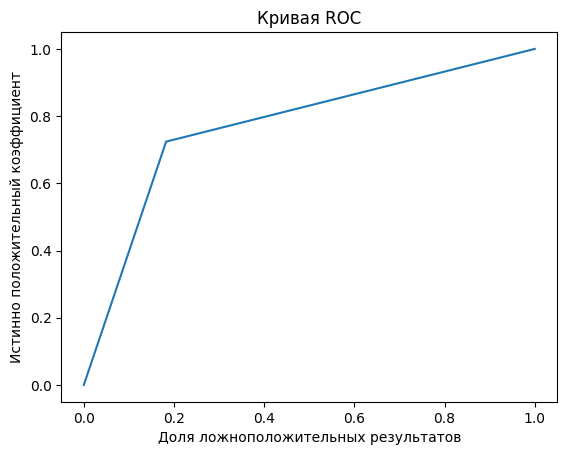

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

print(roc_auc_score(y_test, y_bin_knn_pred10))

fpr, tpr, plot = roc_curve(y_test, y_bin_knn_pred10)

plt.plot(fpr, tpr)
plt.xlabel('Доля ложноположительных результатов')
plt.ylabel('Истинно положительный коэффициент')
plt.title('Кривая ROC')
plt.show()

0.7779948563719774


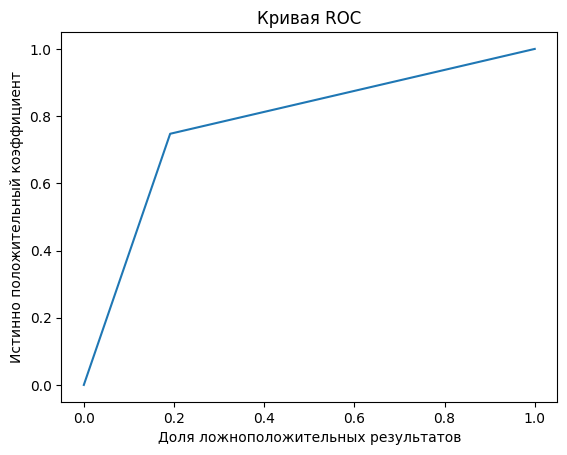

In [43]:
print(roc_auc_score(y_test, y_bin_knn_pred100))

fpr, tpr, plot = roc_curve(y_test, y_bin_knn_pred100)

plt.plot(fpr, tpr)
plt.xlabel('Доля ложноположительных результатов')
plt.ylabel('Истинно положительный коэффициент')
plt.title('Кривая ROC')
plt.show()

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy_score(y_test, y_pred)

0.7474707866049721

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76      6241
           1       0.78      0.70      0.74      6510

    accuracy                           0.75     12751
   macro avg       0.75      0.75      0.75     12751
weighted avg       0.75      0.75      0.75     12751



0.7485732819315114


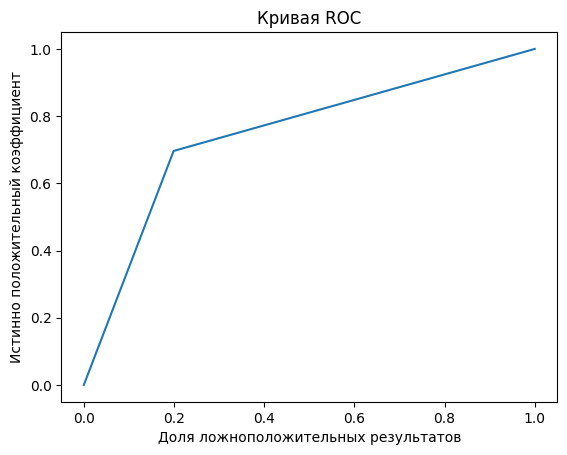

In [47]:
print(roc_auc_score(y_test, y_pred))

fpr, tpr, plot = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel('Доля ложноположительных результатов')
plt.ylabel('Истинно положительный коэффициент')
plt.title('Кривая ROC')
plt.show()

In [48]:
model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', max_iter=200, class_weight='balanced')

In [49]:
model.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=200, penalty='l1',
                   solver='liblinear')

In [50]:
rain_probability = model.predict(X_test)
accuracy_score(y_test, rain_probability)

0.7782918986746138

In [51]:
print(classification_report(y_test, rain_probability))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78      6241
           1       0.79      0.77      0.78      6510

    accuracy                           0.78     12751
   macro avg       0.78      0.78      0.78     12751
weighted avg       0.78      0.78      0.78     12751



0.7785291926364749


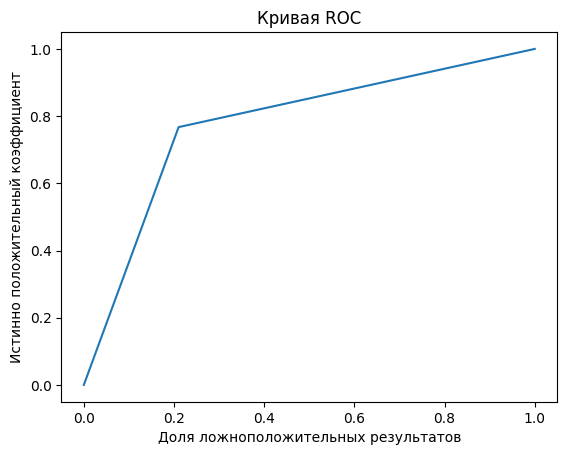

In [52]:
print(roc_auc_score(y_test, rain_probability))

fpr, tpr, plot = roc_curve(y_test, rain_probability)

plt.plot(fpr, tpr)
plt.xlabel('Доля ложноположительных результатов')
plt.ylabel('Истинно положительный коэффициент')
plt.title('Кривая ROC')
plt.show()

In [53]:
from sklearn import svm

In [54]:
clf = svm.SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7987608814994902

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      6241
           1       0.81      0.79      0.80      6510

    accuracy                           0.80     12751
   macro avg       0.80      0.80      0.80     12751
weighted avg       0.80      0.80      0.80     12751



0.798992392362975


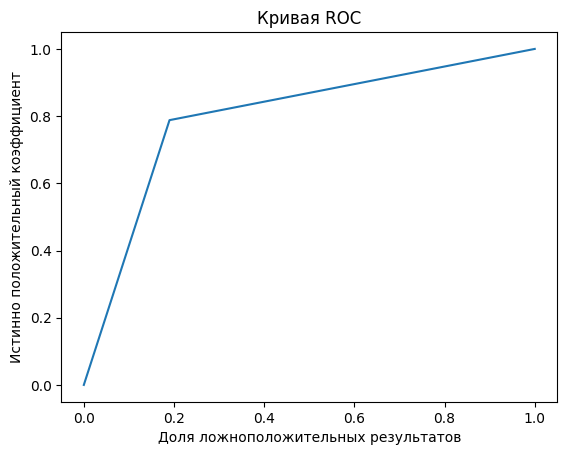

In [56]:
print(roc_auc_score(y_test, y_pred))

fpr, tpr, plot = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel('Доля ложноположительных результатов')
plt.ylabel('Истинно положительный коэффициент')
plt.title('Кривая ROC')
plt.show()

## Построим итоговую модель классификаторов

In [57]:
classifiers = {
    'Logistic Regression': model,
    'KNN classifier': knn100,
    'SVM': clf,
    'Naive Bayes' : gnb
}

In [58]:
n_classifiers = len(classifiers)

for index, (name, classifier) in enumerate(classifiers.items()):

    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))
    print(classification_report(y_test,y_pred))

Accuracy (train) for Logistic Regression: 77.8% 
              precision    recall  f1-score   support

           0       0.76      0.79      0.78      6241
           1       0.79      0.77      0.78      6510

    accuracy                           0.78     12751
   macro avg       0.78      0.78      0.78     12751
weighted avg       0.78      0.78      0.78     12751

Accuracy (train) for KNN classifier: 77.7% 
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      6241
           1       0.80      0.75      0.77      6510

    accuracy                           0.78     12751
   macro avg       0.78      0.78      0.78     12751
weighted avg       0.78      0.78      0.78     12751

Accuracy (train) for SVM: 79.9% 
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      6241
           1       0.81      0.79      0.80      6510

    accuracy                           0.80     12751
  

# Задание 3

In [59]:
#Для начала реализуем метрику Accuracy:

#(количество верно классифицированных объектов) / (общее количество объектов)
def accuracy(y_true, y_pred):
    correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct += 1
    return correct / len(y_true)

In [60]:
#Реализуем метрику Precision:
#истинноположительных классификаций к общему числу положительных классификаций
def precision(y_true, y_pred):
    true_positives = 0
    false_positives = 0
    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
            true_positives += 1
        elif y_true[i] == 0 and y_pred[i] == 1:
            false_positives += 1

    if true_positives + false_positives == 0:
        return 0

    return true_positives / (true_positives + false_positives)

In [61]:
#Реализуем метрику Recall:
#число истинноположительных классификаций относительно общего числа положительных наблюдений
def recall(y_true, y_pred):
    true_positives = 0
    false_negatives = 0
    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
            true_positives += 1
        elif y_true[i] == 1 and y_pred[i] == 0:
            false_negatives += 1

    if true_positives + false_negatives == 0:
        return 0

    return true_positives / (true_positives + false_negatives)

In [62]:
#Реализуем метрику F1:
# Среднее гормоническое между precision и recall
def f1_score(y_true, y_pred):
    precision_val = precision(y_true, y_pred)
    recall_val = recall(y_true, y_pred)

    if precision_val + recall_val == 0:
        return 0

    return 2 * (precision_val * recall_val) / (precision_val + recall_val)

In [90]:
#Теперь реализуем алгоритм kNN:

# Расстояние Евклида между двумя точками
#вычисляет Евклидово расстояние между двумя точками в n-мерном пространстве.
#Она используется для измерения расстояния между новой точкой и обучающими данными.

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    # Устанавливаем параметры
    def __init__(self, k=3):
        self.k = k
    # Сохраняем обучающие данные 
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    #Для каждого элемента x в X вызывается метод _predict, чтобы получить предсказание для отдельного элемента.
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    
    def _predict(self, x):
        #Вычисляем расстояния от x до всех обучающих данных с помощью функции euclidean_distance.
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Сортируем расстояния и получаем индексы k ближайших соседей.
        k_indices = np.argsort(distances)[:self.k]
        # Метки классов k ближайших соседей
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Подсчет самого частого класса
        counts = np.bincount(k_nearest_labels)
        most_common = np.argmax(counts)

        # Возвращаем самый частый класс
        return most_common

Проверим работу

In [97]:
X_train2 = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0], [9, 11]])
y_train2 = np.array([0, 0, 1, 1, 0, 1])

knn = KNN(k=3)
knn.fit(X_train2, y_train2)

X_test2 = np.array([[2, 3], [6, 9], [1, 1]])
y_test2 = np.array([0, 1, 1])
y_pred2 = knn.predict(X_test2)
print(y_pred2)

[0 1 0]


In [98]:
accuracy(y_test2, y_pred2)

0.6666666666666666

In [99]:
precision(y_test2, y_pred2)

1.0

In [100]:
recall(y_test2, y_pred2)

0.5

In [101]:
f1_score(y_test2, y_pred2)

0.6666666666666666